# Train a Griddifier

## Load reference library

In [1]:
import csv
from pathlib import Path
import random

ref_lib = Path().joinpath("reference_library.csv")
with open(ref_lib) as f:
    file = csv.reader(f)
    smiles = [line[0] for line in file]

random.seed(42)
sampled_smiles = random.sample(smiles, 50000)

## Generate efps

In [2]:
from eosce.models import ErsiliaCompoundEmbeddings

model = ErsiliaCompoundEmbeddings()
embeddings = model.transform(sampled_smiles)

## Generate griddfier

5it [00:13,  2.73s/it]
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<AxesSubplot:>

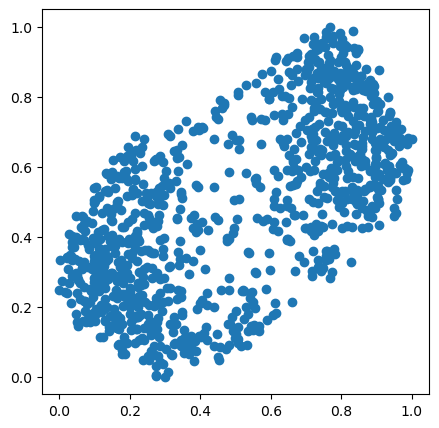

In [4]:
from griddify import FeatureDistances, Tabular2Cloud
from griddify.plots import cloud_plot

fd = FeatureDistances(metric="cosine").calculate(embeddings)
tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)
cloud_plot(Xc)

<AxesSubplot:>

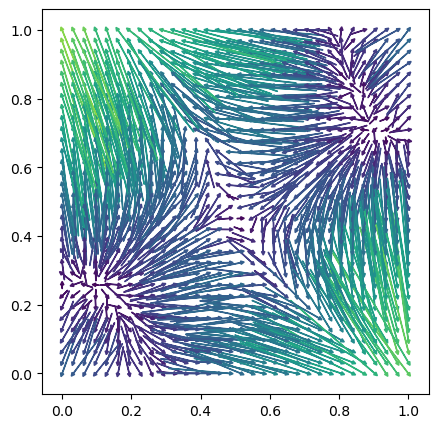

In [5]:
from griddify import Cloud2Grid
from griddify.plots import arrows_plot

cg = Cloud2Grid()
cg.fit(Xc)
Xg = cg.transform(Xc)
mappings, side = cg.get_mappings(Xc)

arrows_plot(Xc, Xg)

<AxesSubplot:>

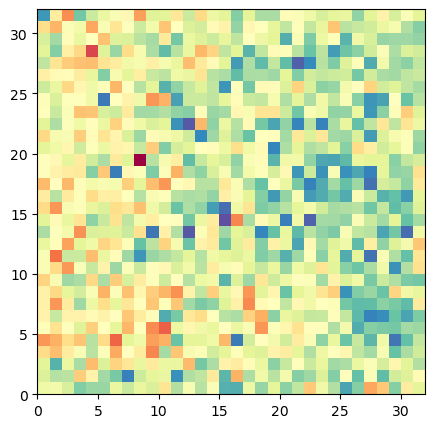

In [6]:
from griddify import Flat2Grid
from griddify.plots import grid_plot

fg = Flat2Grid(mappings, side)
Xi = fg.transform(embeddings)
grid_plot(Xi[0])

## Save gridffier

In [7]:
import joblib
joblib.dump(fg, "griddify.joblib")

['griddify.joblib']